# Bayesian Exploration
Here we demonstrate the use of Bayesian Exploration to characterize an unknown
function in the presence of constraints (see [here](https://www.nature.com/articles/s41467-021-25757-3)).
The function we wish to explore is the first objective of the TNK test problem.

## Specifiying generator options
We start with the generator defaults and modify as needed for conservative
exploration, which should prevent any constraint violations.

In [1]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import torch
import yaml
from copy import deepcopy
from xopt import Xopt, Evaluator
from xopt.generators.bayesian import BayesianExplorationGenerator
from xopt.resources.test_functions.tnk import evaluate_TNK, tnk_vocs

vocs = deepcopy(tnk_vocs)

# can only explore one objective
del vocs.objectives["y2"]

generator_options = BayesianExplorationGenerator.default_options()
generator_options.optim.num_restarts = 20
generator_options.optim.raw_samples = 20
generator_options.optim.max_travel_distances = [0.25, 0.25]
generator_options.optim.use_nearby_initial_points = False
generator_options.model.kwargs.use_conservative_prior_mean = True
generator_options.model.kwargs.use_conservative_prior_lengthscale = True
generator_options.model.kwargs.use_low_noise_prior = True

evaluator = Evaluator(function=evaluate_TNK)
generator = BayesianExplorationGenerator(vocs, generator_options)

print(yaml.dump(generator.options.dict()))

acq:
  monte_carlo_samples: 128
  proximal_lengthscales: null
  use_transformed_proximal_weights: true
model:
  function: !!python/name:xopt.generators.bayesian.models.standard.create_standard_model ''
  kwargs:
    use_conservative_prior_lengthscale: true
    use_conservative_prior_mean: true
    use_low_noise_prior: true
n_initial: 3
optim:
  max_travel_distances:
  - 0.25
  - 0.25
  num_restarts: 20
  raw_samples: 20
  sequential: true
  use_nearby_initial_points: false



## Run exploration
We start with evaluating 2 points that we know satisfy the constraints. We then run
30 exploration steps.

In [2]:
X = Xopt(generator=generator, evaluator=evaluator, vocs=vocs)
X.evaluate_data(pd.DataFrame({"x1":[1.0, 0.75],"x2":[0.75, 1.0]}))

x1    x2    y1    y2        c1      c2 some_array  xopt_runtime  \
1  1.00  0.75  1.00  0.75  0.626888  0.3125  [1, 2, 3]      0.000078   
2  0.75  1.00  0.75  1.00  0.626888  0.3125  [1, 2, 3]      0.000018   

   xopt_error  
1       False  
2       False

In [3]:
for i in range(30):
    print(f"step {i}")
    X.step()

step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29


In [4]:
# view the data
X.data

x1        x2        y1        y2        c1        c2 some_array  \
1   1.000000  0.750000  1.000000  0.750000  0.626888  0.312500  [1, 2, 3]   
2   0.750000  1.000000  0.750000  1.000000  0.626888  0.312500  [1, 2, 3]   
3   1.143989  1.546851  1.143989  1.546851  2.773682  1.510620  [1, 2, 3]   
4   0.950704  1.753757  0.950704  1.753757  2.988896  1.775040  [1, 2, 3]   
5   0.377958  2.429337  0.377958  2.429337  5.122781  3.737234  [1, 2, 3]   
6   1.067748  2.580705  1.067748  2.580705  6.700126  4.651671  [1, 2, 3]   
7   1.696540  2.261667  1.696540  2.261667  7.057673  4.535179  [1, 2, 3]   
8   1.357299  2.579555  1.357299  2.579555  7.485974  5.059511  [1, 2, 3]   
9   0.699833  1.907197  0.699833  1.907197  3.047932  2.020135  [1, 2, 3]   
10  1.291429  2.109139  1.291429  2.109139  5.196817  3.215689  [1, 2, 3]   
11  1.561309  2.063395  1.561309  2.063395  5.754320  3.570582  [1, 2, 3]   
12  2.111537  1.326253  2.111537  1.326253  5.307512  3.279746  [1, 2, 3]   
13  2.577471  0.907865  2.577471  0.907865  6.402682  4.482239  [1, 2, 3]   
14  1.955905  1.239616  1.955905  1.239616  4.454832  2.666690  [1, 2, 3]   
15  1.991165  0.611555  1.991165  0.611555  3.333198  2.236019  [1, 2, 3]   
16  2.332876  0.519670  2.332876  0.519670  4.805770  3.359823  [1, 2, 3]   
17  3.020162  0.429165  3.020162  0.429165  8.369038  6.356235  [1, 2, 3]   
18  2.678476  0.755775  2.678476  0.755775  6.776139  4.811179  [1, 2, 3]   
19  1.919744  0.486599  1.919744  0.486599  2.989663  2.015854  [1, 2, 3]   
20  1.459035  0.137096  1.459035  0.137096  1.140406  1.051448  [1, 2, 3]   
21  1.056602  0.765187  1.056602  0.765187  0.784242  0.380130  [1, 2, 3]   
22  0.736458  0.996683  0.736458  0.996683  0.608433  0.302606  [1, 2, 3]   
23  0.622619  0.970628  0.622619  0.970628  0.425329  0.236526  [1, 2, 3]   
24  0.546542  0.954307  0.546542  0.954307  0.254504  0.208561  [1, 2, 3]   
25  0.511478  0.948892  0.511478  0.948892  0.167613  0.201636  [1, 2, 3]   
26  1.079645  0.768562  1.079645  0.768562  0.845317  0.408114  [1, 2, 3]   
27  0.803371  0.607451  0.803371  0.607451  0.073880  0.103580  [1, 2, 3]   
28  0.934548  0.804828  0.934548  0.804828  0.484061  0.281753  [1, 2, 3]   
29  0.799265  0.601787  0.799265  0.601787  0.063042  0.099920  [1, 2, 3]   
30  0.796507  0.597660  0.796507  0.597660  0.055732  0.097454  [1, 2, 3]   
31  1.101616  0.769067  1.101616  0.769067  0.899732  0.434339  [1, 2, 3]   
32  0.482034  0.947013  0.482034  0.947013  0.097661  0.200143  [1, 2, 3]   

    xopt_runtime  xopt_error               a  
1       0.000078       False             NaN  
2       0.000018       False             NaN  
3       0.000041       False  dummy_constant  
4       0.000038       False  dummy_constant  
5       0.000040       False  dummy_constant  
6       0.000037       False  dummy_constant  
7       0.000038       False  dummy_constant  
8       0.000040       False  dummy_constant  
9       0.000041       False  dummy_constant  
10      0.000041       False  dummy_constant  
11      0.000038       False  dummy_constant  
12      0.000040       False  dummy_constant  
13      0.000040       False  dummy_constant  
14      0.000038       False  dummy_constant  
15      0.000038       False  dummy_constant  
16      0.000038       False  dummy_constant  
17      0.000036       False  dummy_constant  
18      0.000038       False  dummy_constant  
19      0.000042       False  dummy_constant  
20      0.000039       False  dummy_constant  
21      0.000038       False  dummy_constant  
22      0.000040       False  dummy_constant  
23      0.000039       False  dummy_constant  
24      0.000039       False  dummy_constant  
25      0.000040       False  dummy_constant  
26      0.000039       False  dummy_constant  
27      0.000040       False  dummy_constant  
28      0.000042       False  dummy_constant  
29      0.000040       False  dummy_constant  
30      0.000042       False  dummy_constant  
31      0.0

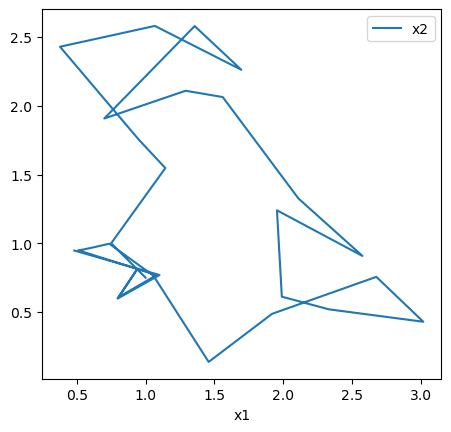

In [5]:
# plot results
ax = X.data.plot("x1", "x2")
ax.set_aspect("equal")

## Introspect models
During exploration we generate Gaussian Process models of each objective and
constraint. We demonstrate how they are viewed below.

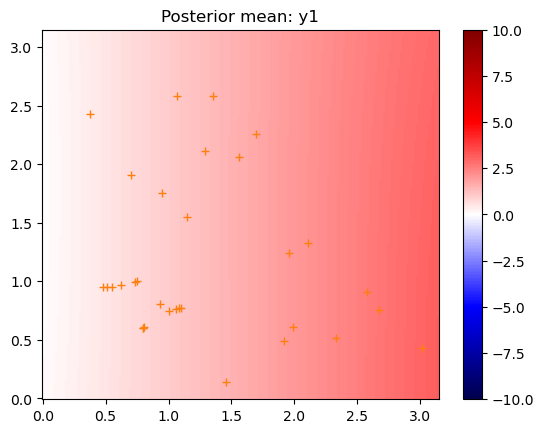

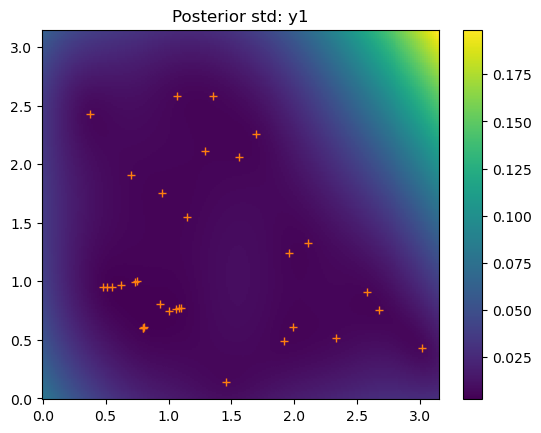

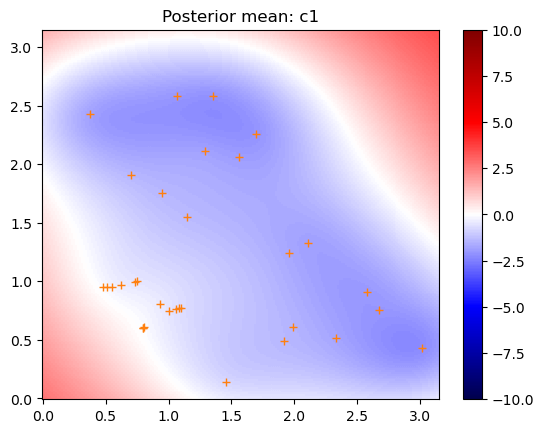

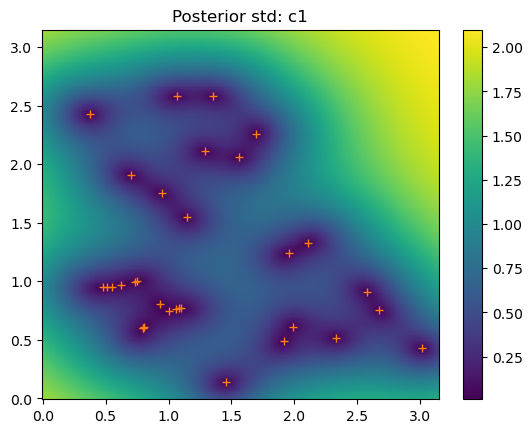

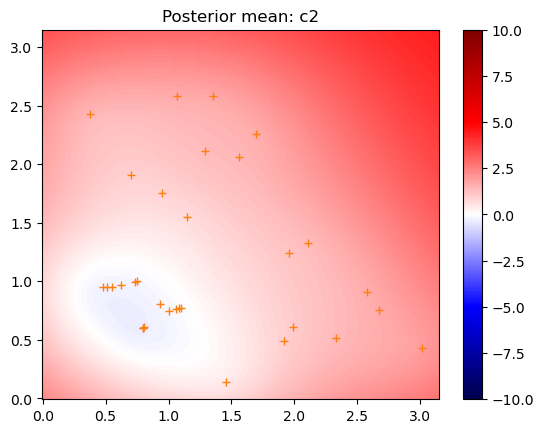

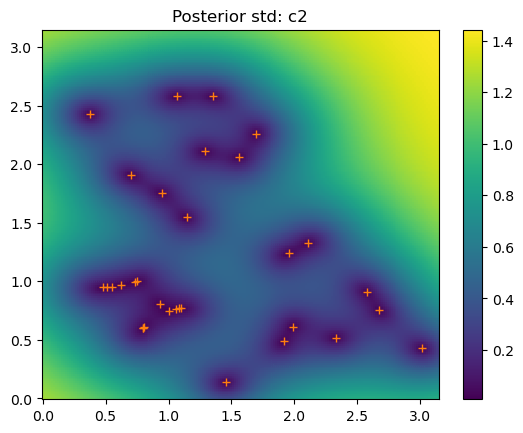

In [6]:
from matplotlib import pyplot as plt  # plot model predictions

data = X.data

bounds = generator.vocs.bounds
model = generator.train_model(generator.data)

# create mesh
n = 200
x = torch.linspace(*bounds.T[0], n)
y = torch.linspace(*bounds.T[1], n)
xx, yy = torch.meshgrid(x, y)
pts = torch.hstack([ele.reshape(-1, 1) for ele in (xx, yy)]).double()

outputs = generator.vocs.output_names
with torch.no_grad():
    post = model.posterior(pts)

    mean = post.mean
    std = torch.sqrt(post.variance)

    for i in range(mean.shape[-1]):
        fig, ax = plt.subplots()
        ax.plot(*data[["x1", "x2"]].to_numpy().T, "+C1")
        c = ax.pcolor(xx, yy, mean[:, i].reshape(n, n), cmap="seismic",vmin=-10.0,
                      vmax=10.0)
        fig.colorbar(c)
        ax.set_title(f"Posterior mean: {outputs[i]}")

        fig2, ax2 = plt.subplots()
        ax2.plot(*data[["x1", "x2"]].to_numpy().T, "+C1")
        c = ax2.pcolor(xx, yy, std[:, i].reshape(n, n))
        fig2.colorbar(c)
        ax2.set_title(f"Posterior std: {outputs[i]}")

## View acquisition function and feasibility prediction

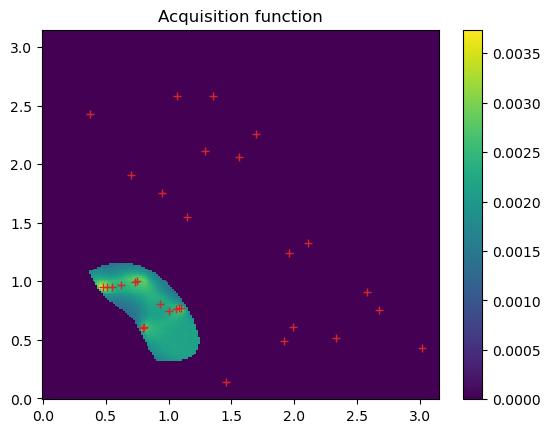

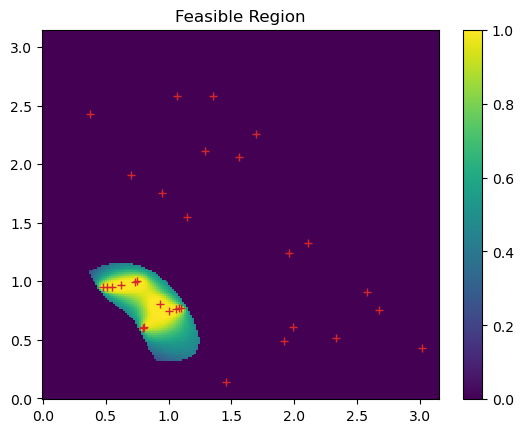

In [7]:
from xopt.generators.bayesian.utils import feasibility

acq_func = generator.get_acquisition(model)
with torch.no_grad():
    acq_pts = pts.unsqueeze(1)
    acq = acq_func(acq_pts)

    fig, ax = plt.subplots()
    c = ax.pcolor(xx, yy, acq.reshape(n, n))
    ax.plot(*data[["x1", "x2"]].to_numpy().T, "+C3")

    fig.colorbar(c)
    ax.set_title("Acquisition function")

    feas = feasibility(pts.unsqueeze(1), model, generator.sampler, vocs).flatten()

    fig2, ax2 = plt.subplots()
    c = ax2.pcolor(xx, yy, feas.reshape(n, n))
    ax2.plot(*data[["x1", "x2"]].to_numpy().T, "+C3")

    fig2.colorbar(c)
    ax2.set_title("Feasible Region")

## Generator model hyperparameters

In [8]:
# print generator model hyperparameters
for name, val in X.generator.model.named_parameters():
    print(f"{name}:{val}")

X.generator.model.models[2].covar_module.base_kernel.lengthscale

models.0.likelihood.noise_covar.raw_noise:Parameter containing:
tensor([-25.2261], dtype=torch.float64, requires_grad=True)
models.0.mean_module.raw_constant:0.41825310240950636
models.0.covar_module.raw_outputscale:2.5852954823310372
models.0.covar_module.base_kernel.raw_lengthscale:Parameter containing:
tensor([[0.9636, 2.0629]], dtype=torch.float64, requires_grad=True)
models.1.likelihood.noise_covar.raw_noise:Parameter containing:
tensor([-26.1141], dtype=torch.float64, requires_grad=True)
models.1.mean_module.raw_constant:5.0
models.1.covar_module.raw_outputscale:4.653498836234258
models.1.covar_module.base_kernel.raw_lengthscale:Parameter containing:
tensor([[-0.9332, -1.1823]], dtype=torch.float64, requires_grad=True)
models.2.likelihood.noise_covar.raw_noise:Parameter containing:
tensor([-25.8458], dtype=torch.float64, requires_grad=True)
models.2.mean_module.raw_constant:5.0
models.2.covar_module.raw_outputscale:2.06262897199191
models.2.covar_module.base_kernel.raw_lengthscal

tensor([[0.3165, 0.2629]], dtype=torch.float64, grad_fn=<SoftplusBackward0>)

## Examine the number of constraint violations
Using the convience function provided by the vocs object we can evaluate which
samples violate either or both of our constraints.

In [9]:
X.vocs.feasibility_data(X.data)

feasible_c1  feasible_c2  feasible
1          True         True      True
2          True         True      True
3          True        False     False
4          True        False     False
5          True        False     False
6          True        False     False
7          True        False     False
8          True        False     False
9          True        False     False
10         True        False     False
11         True        False     False
12         True        False     False
13         True        False     False
14         True        False     False
15         True        False     False
16         True        False     False
17         True        False     False
18         True        False     False
19         True        False     False
20         True        False     False
21         True         True      True
22         True         True      True
23         True         True      True
24         True         True      True
25         True         True      True
26         True         True      True
27         True         True      True
28         True         True      True
29         True         True      True
30         True         True      True
31         True         True      True
32         True         True      True